#  프로젝트 : 다양한 OCR모델 비교하기

이 프로젝트에서  Google OCR API, keras-ocr, Tesseract 3가지의 OCR 기능을 간단히 활용할것이다.


#### 개인 실습환경에 따라 필요한 경로를 지정, 디렉토리를 생성해 주세요.

```

$ mkdir -p ~/aiffel/ocr_python.
```

# Step1. 검증용 데이터셋 준비
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.





## 폴더 이미지 가져오기

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/ocr_python/ocr_img'
file_list = os.listdir(dir_path)
print(type(file_list))
print ("file_list: {}".format(file_list))



<class 'list'>
file_list: ['11.jpg', '이동', 'crop10', '12.png', '03.jpg', 'crop3', '02.jpg', '05.jpg', '08.png', '01.jpg', '10.jpg', 'crop8', '04.jpg', 'crop7', '09.jpg', 'crop1', 'crop5', '06.png', 'crop6', '07.png', 'crop4', '12', 'crop2', 'crop9']


#### 현재디렉토리에는 폴더와 이미로 구성되어 있다. 폴더명에는 '.'(온점)문자를 갖지 않기때문에 온점이 인 경우를 이미지 파일로 생각하자

In [2]:
tmp_list=[]

#리스트중 crop문자 갖고 있는 인덱스 del_index리스트에 저장
for i in range(len(file_list)):
    if '.'  in file_list[i]:
        tmp_list.append(file_list[i])

#file_list = tmp_list        
file_list = sorted(tmp_list)
print(file_list)

['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.png', '07.png', '08.png', '09.jpg', '10.jpg', '11.jpg', '12.png']


In [3]:
image_list = []
for image in file_list:
    image_path = dir_path+'/' +image
   
    image_list.append(image_path) 
    #print(image_path)

In [4]:
image_list

['/home/aiffel-dj60/aiffel/ocr_python/ocr_img/01.jpg',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/02.jpg',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/03.jpg',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/04.jpg',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/05.jpg',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/06.png',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/07.png',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/08.png',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/09.jpg',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/10.jpg',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/11.jpg',
 '/home/aiffel-dj60/aiffel/ocr_python/ocr_img/12.png']

# Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.



## google OCR API 사용 테스트
- 노드에서 제공해주는 소스 사용시 이미지에서 문자를 dection 못할경우 에러가 발생하였다.
그래서 예외처리를 추가하였다.

In [5]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [7]:

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
#path = # [[YOUR IMAGE FILE PATH]]   

for img_path in image_list:
    # 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
    print(" -----------------------------------\n\n" + img_path)
    try:
        detect_text(img_path)
    except UnboundLocalError: 
        print ('Error: UnboundLocalError ' )
        print ("이미지경로:"+  img_path )
        print ('에러발생이유 이미지에서 문자를 찾기 못함')
        print ('---------------------------------------------')


 -----------------------------------

/home/aiffel-dj60/aiffel/ocr_python/ocr_img/01.jpg
Texts:

"REPLACE THE
FEAR OF THE
UNKNOWN WITH
CURIOSITY.
"

"REPLACE"

"THE"

"FEAR"

"OF"

"THE"

"UNKNOWN"

"WITH"

"CURIOSITY."
bounds: (106,136),(403,138),(403,181),(106,179)
 -----------------------------------

/home/aiffel-dj60/aiffel/ocr_python/ocr_img/02.jpg
Texts:

"REPLACE:
FEAR OF
THE UNKNOWN
WITH N
LCURIOSITY:1
"

"REPLACE:"

"FEAR"

"OF"

"THE"

"UNKNOWN"

"WITH"

"N"

"LCURIOSITY:1"
bounds: (1,304),(699,296),(700,367),(2,375)
 -----------------------------------

/home/aiffel-dj60/aiffel/ocr_python/ocr_img/03.jpg
Texts:

"RIGHT
LANE
MUST
TURN
Cro RIGHT
NO
TURN
ON
RED
"

"RIGHT"

"LANE"

"MUST"

"TURN"

"Cro"

"RIGHT"

"NO"

"TURN"

"ON"

"RED"
bounds: (389,513),(468,514),(468,552),(389,551)
 -----------------------------------

/home/aiffel-dj60/aiffel/ocr_python/ocr_img/04.jpg
Texts:

"LIVE
COLORFULLY
"

"LIVE"

"COLORFULLY"
bounds: (658,764),(2127,764),(2127,959),(658,959)
 -------

## keras-ocr 써보기

keras-ocr은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해준다. 

```
주의 keras-ocr 은 tensorflow 버전 2.2.0 에서 구동됩니다. 2.3.X 이상 버전에서는 미리 학습된 모델에서 오류가 발생할 수 있으니 주의

$ pip list | grep tensorflow

# 만약 tensorflow 버전이 맞지 않다면 재설치를 하기
$ pip uninstall tensorflow
$ pip install tensorflow==2.2.0

```

이제 keras-ocr 사용을 위해서 설치를 해 준다.
```
$ pip install keras-ocr
```

필요한 라이브러리인 keras_ocr 과 인식결과의 시각화를 위한 matplotlib.pyplot 를 불러온다. keras_ocr.pipeline.Pipeline() 는 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러온다. 검출기와 인식기를 위한 가중치 하나씩을 불러옴.

참고: [keras_ocr 공식문서](https://keras-ocr.readthedocs.io/en/latest/index.html)

```
❗️ 아래 과정은 GPU를 사용할 수 있습니다. 평소 GPU 사용 시 cuDNN 관련 에러가 있었다면 아래 명령어를 사용해 보세요. export TF_FORCE_GPU_ALLOW_GROWTH=true
```
(편집자 주) AIFFEL 학습환경 설치 과정에서 위 옵션이 아래와 같이 환경설정에 반영되어 있습니다.
```
$ echo "export TF_FORCE_GPU_ALLOW_GROWTH=true"
>> ~/.bashrc
```


확인을 위해서 터미널을 열어 다음과 같이 확인해 보시기 바랍니다. true가 출력되어야 환경설정에 반영되어 있는 것입니다. 만약 이 환경설정이 반영되어 있지 않으면 이후 코드 구동 과정에서 OOM(Out Of Memory) 에러가 날 수 있습니다.

```
$ echo $TF_FORCE_GPU_ALLOW_GROWTH
```

In [9]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

# 테스트에 사용할 이미지 path을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
images = [ keras_ocr.tools.read(img_path) for img_path in image_list]



Looking for /home/aiffel-dj60/.keras-ocr/craft_mlt_25k.h5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Looking for /home/aiffel-dj60/.keras-ocr/crnn_kurapan.h5


In [10]:
prediction_groups = [pipeline.recognize([image_path]) for image_path in image_list]

/home/aiffel-dj60/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


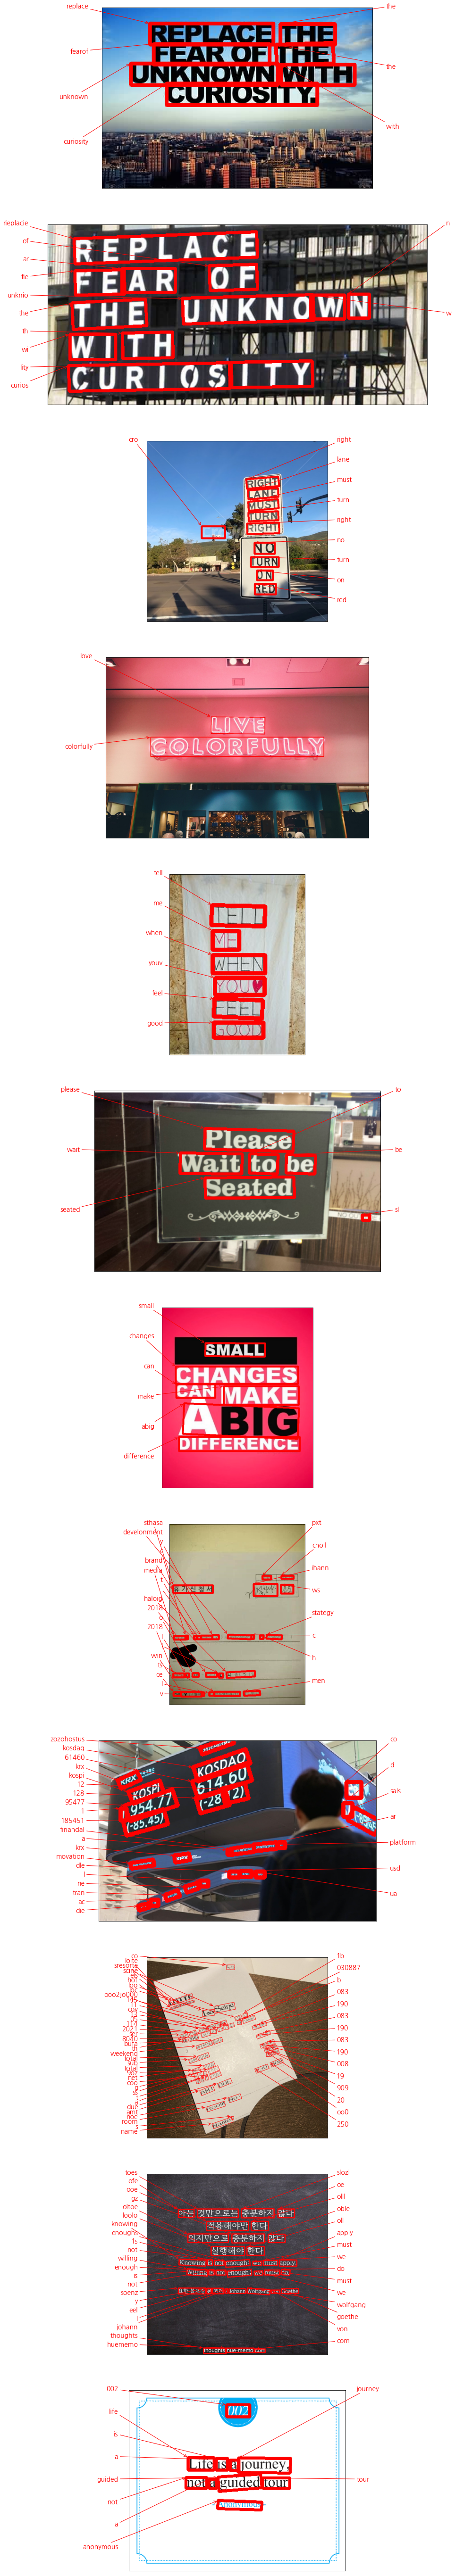

In [11]:
# Plot the predictions

fig, axs = plt.subplots(nrows=len(images), figsize=(30, 30) )
x = 100   # 가로 길이 
y = 100   # 세로 길이
fig.set_figwidth(x)
fig.set_figheight(y)


for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 테서랙트 써보기

### 테서랙트 설치하기
우선 우분투에서 실행할 경우 터미널에서 아래 코드를 사용해 테서랙트 관련 패키지들을 설치해 주세요. 혹시 다른 운영체제를 사용하실 경우에는 아래 Tesseract Install Guide를 참고해주세요.
- [Tesseract Install Guide](https://github.com/tesseract-ocr/tesseract/wiki)
```
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
```

###  테서랙트 파이썬 wrapper 설치하기
Pytesseract는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수있도록 해주는 래퍼 라이브러리(wrapper library)입니다. 파이썬 내에서 컴퓨터에 설치된 테서랙트 엔진의 기능을 바로 쓸 수 있도록 해줍니다.
- 참고: [pytesseract](https://pypi.org/project/pytesseract/)
- 참고: [위키백과: 래퍼 라이브러리](https://ko.wikipedia.org/wiki/%EB%9E%98%ED%8D%BC_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC)
```
$ pip install pytesseract
```

### 테서랙트로 문자 검출하고 이미지 자르기 (detection)
테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식을 할 수 있다.   


In [12]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

### 폴더(crop될 이미지 저장)생성 함수

In [16]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [17]:
folder_crop_list = []
# dir_path = os.getenv('HOME')+'/aiffel/ocr_python/ocr_img'
print('이미지 개수              ',len(image_list))

for i in range(1,len(image_list)+1): # 이미지 개수만큼 반복
    #print(i)
    strr = dir_path + "/crop" + str(i)+'/' # 폴더 이름 설정
    folder_crop_list.append(strr) # 폴더 경로 저장
    createFolder(strr) # 폴더 생성
    #print(strr)

print('crop작업에 필요한 폴더 개수',len(folder_crop_list))

이미지 개수               12
crop작업에 필요한 폴더 개수 12


```
image_list
folder_crop_list
```

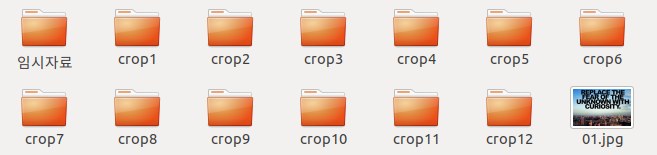

In [18]:
total_cropped_image_path_list =[]

for i in range(1,len(image_list)): # 이미지 개수만큼 반복
    cropped_image_path_list = crop_word_regions(image_list[i], folder_crop_list[i])
    total_cropped_image_path_list.append(cropped_image_path_list)

/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0000.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0001.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0002.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0003.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0004.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0005.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0006.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0007.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0008.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0009.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0010.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0011.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0012.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0013.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0014.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0015.png
/home/aiffel-dj60/aiffel/ocr_python/ocr_img/crop2/0016.p

### 테서랙트로 잘린 이미지에서 단어 인식하기

In [20]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
#recognize_images(cropped_image_path_list)

In [21]:
i=1
for tmp in total_cropped_image_path_list: # 이미지 개수만큼 반복
    print("--------",i,"번 이미지-----------------------")
    recognize_images(tmp)
    i= i+1
    print("--------------------------------------------")
    

-------- 1 번 이미지-----------------------
?

Esser

T | ae

) ORY

F


KNOW


ian ae |

I |

¢


Re &


Stage &


ALT BINGE ¢.

wil.

a

Done
--------------------------------------------
-------- 2 번 이미지-----------------------
= 3 bs

Done
--------------------------------------------
-------- 3 번 이미지-----------------------
oe.

Done
--------------------------------------------
-------- 4 번 이미지-----------------------

Done
--------------------------------------------
-------- 5 번 이미지-----------------------
et - a i,

i

=

Ho

Please


we

be


Seated

_

Done
--------------------------------------------
-------- 6 번 이미지-----------------------
CHANGES

CAN

Pay qa

BIG

DIFFERENCE

Done
--------------------------------------------
-------- 7 번 이미지-----------------------

ee

eo

df

. v | . = 4

CARLOLA}

Ale itor

A



—_ a ae

=

Jt

Al

At

AW

ry

a

YV/

Maca {


. v | . = 4

Brand {'\/

\

. v | . = 4

Develoornrent |



# Step3. 테스트 결과 정리
- 모듈들마다 출력 형태가 다릅니다. 각 모델결과를 분석해보자
- 여러가지 이미지중 2가지 이미지만 분석해보겠다.


## 이미지1

## 구글 API

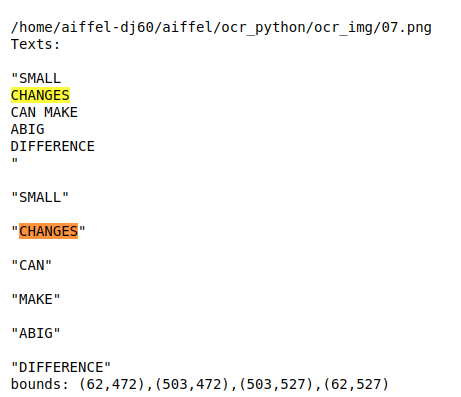

## keras-ocr

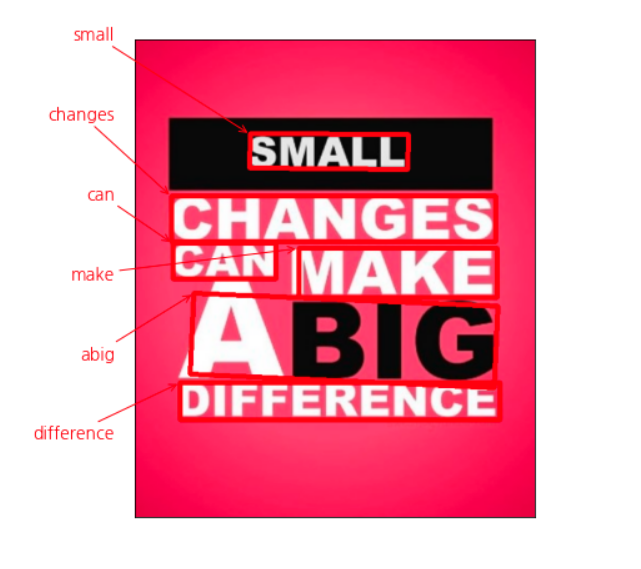

## 테서렉트

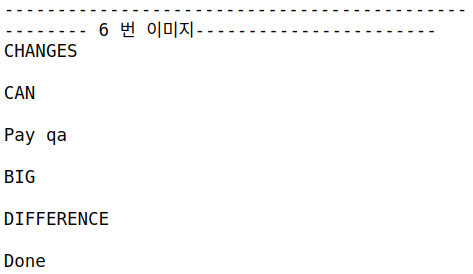

In [42]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

dir_crop_path = os.getenv('HOME')+'/aiffel/ocr_python/ocr_img/crop7/*'
path = glob.glob(dir_crop_path)
img_crop_list = []

for img in path:
    n = cv.imread(img)
    img_crop_list.append(n)
 

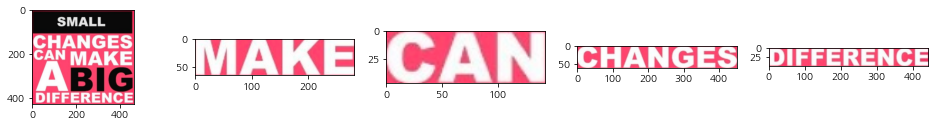

In [46]:

plt.figure(figsize=(20,10))
for i in range(len(img_crop_list)):
    plt.subplot(5,6,i+1)
    img = cv2.cvtColor(img_crop_list[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)

이미지를 확인해보면 구글api와 keras는 abig를 제외하고는 정확하게 분리를 하였다. 테서렉트인 경우 dection도 정확히 하지 못했고, 단어를 정확히 뽑아내지 못하였다.

# 이미지2

## 구글API

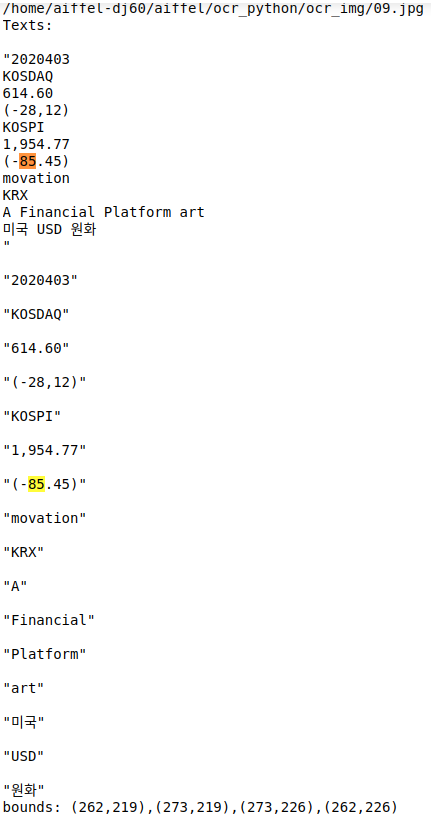

## 케라스

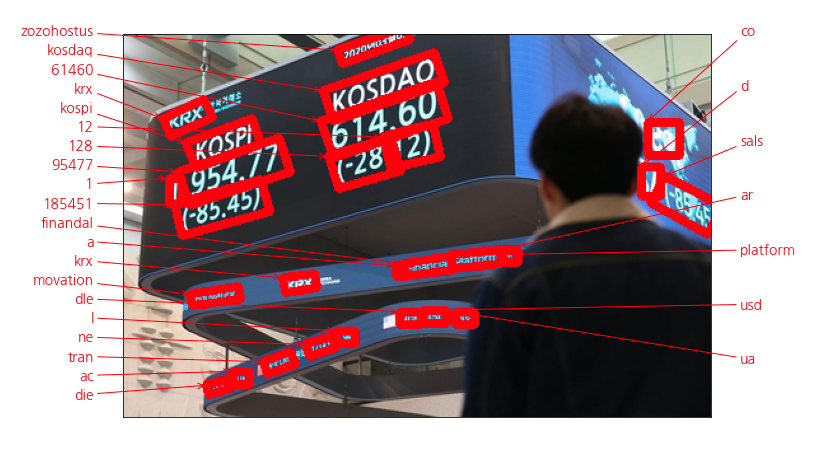

## 테서렉트

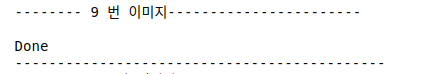

이미지를 확인해보면 구글api와 거의 정확히 한글,숫자,영어 문자를 찾아냈다.케라스는 dection를 하였지만 텍스트내용이 정확하지 않았다. 테서렉트같은 경우 이미지에서 어떠한 문자도 찾지 못하였다.

# Step4. 결과 분석과 결론 제시
성능을 따시면 구글API(1), keras(2), 테서렉트(3) 순으로 구글API 성능이 가장 좋았다.     
케라스 같은경우 문자별로 dection 어느정도 하지만 텍스트로 뽑아내오는것이 정확하지 않았고, 테서렉트는 dection기능조차 잘 동작하지 않았다.

참고(수희님 왈)
```
Google OCR API : detection O, recognition O
keras-orc : detection O, recognition △ (한글이 안됨)
테서랙트 : detection △, recognition △ (lang='eng+kor' 설정을 통하여 한글/영어를 동시에 찾을 수는 있으나, detection과 recognition 모두 불안정)
```